In [1]:
# Verarbeitung von Daten über Flüge mit 3 Millionen Zeilen.
# Analysieren und visualisieren dieser Daten, Versuche verschiedene Korrelationen zu finden.
# Bereinigung dieser Datei, um bessere Ergebnisse zu erzielen.

In [2]:
from google.colab import drive

drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy.stats import chi2_contingency
from scipy import stats

try:

  file_name = input("Please provide your file name ")

  if file_name == "":
    file_name = "flight_data.csv"
  elif "flight" or "flight_data" in file_name:
    file_name = "flight_data.csv"
  else:
    pass

  df = pd.read_csv(f"/content/MyDrive/MyDrive/{file_name}")

except FileNotFoundError:
  print("This file cannot be found.")

Please provide your file name 


In [8]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77602
DEP_DELAY                    77630
TAXI_OUT                     78792
WHEELS_OFF                   78792
WHEELS_ON                    79930
TAXI_IN                      79930
CRS_ARR_TIME                     0
ARR_TIME                     79928
ARR_DELAY                    86184
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                 86184
AIR_TIME                     86184
DISTANCE                         0
DELAY_DUE_CARRIER          2466123
DELAY_DUE_WEATHER   

In [9]:
# Drop rows with missing values

while True:

  df = df.dropna(axis=0, subset=['CRS_ELAPSED_TIME'])

  break

print(len(df))

2999986


In [10]:
def format_time(time_str):
    return time_str[:2] + ":" + time_str[2:]

df['DEP_TIME'] = df['DEP_TIME'].astype(str)
df['DEP_TIME'] = df['DEP_TIME'].apply(format_time)

df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(str)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(format_time)

df['WHEELS_OFF'] = df['WHEELS_OFF'].astype(str)
df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(format_time)

df['WHEELS_ON'] = df['WHEELS_OFF'].astype(str)
df['WHEELS_ON'] = df['WHEELS_OFF'].apply(format_time)

df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].astype(str)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(format_time)

df['ARR_TIME'] = df['ARR_TIME'].astype(str)
df['ARR_TIME'] = df['ARR_TIME'].apply(format_time)


print(df.dtypes)

FL_DATE                    datetime64[ns]
AIRLINE                            object
AIRLINE_DOT                        object
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                       object
DEP_TIME                           object
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                         object
WHEELS_ON                          object
TAXI_IN                           float64
CRS_ARR_TIME                       object
ARR_TIME                           object
ARR_DELAY                         float64
CANCELLED                         float64
CANCELLATION_CODE                  object
DIVERTED                          float64
CRS_ELAPSED_TIME                  

In [12]:
print(df.dtypes)

FL_DATE                    datetime64[ns]
AIRLINE                            object
AIRLINE_DOT                        object
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                       object
DEP_TIME                           object
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                         object
WHEELS_ON                          object
TAXI_IN                           float64
CRS_ARR_TIME                       object
ARR_TIME                           object
ARR_DELAY                         float64
CANCELLED                         float64
CANCELLATION_CODE                  object
DIVERTED                          float64
CRS_ELAPSED_TIME                  

In [13]:
# How many 0 and 1 have binary columns?

counts = df['CANCELLED'].value_counts()
print(counts)

counts = df['DIVERTED'].value_counts()
print(counts)


CANCELLED
0.0    2920860
1.0      79126
Name: count, dtype: int64
DIVERTED
0.0    2992930
1.0       7056
Name: count, dtype: int64


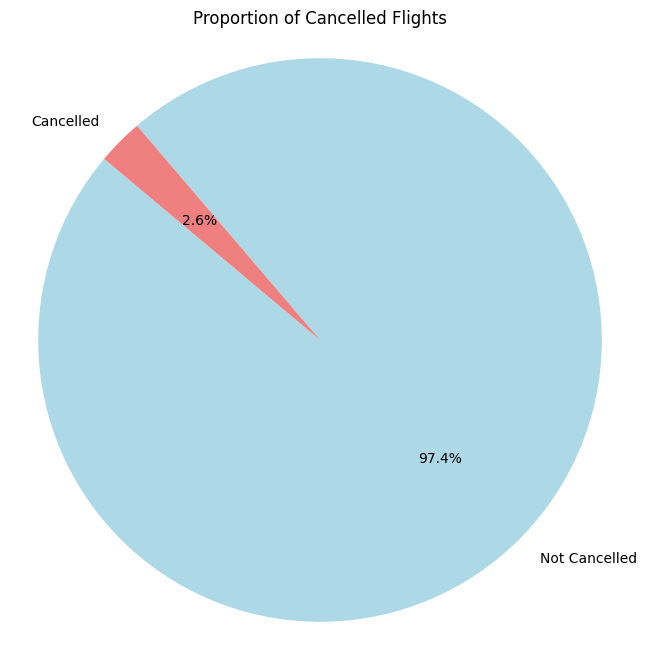

In [14]:
# Calculate overall counts of cancelled and non-cancelled flights
overall_counts = df['CANCELLED'].value_counts()

# Calculate the proportion of cancelled flights
cancelled_proportion = overall_counts[1] / overall_counts.sum()

# Create a pie chart
labels = ['Not Cancelled', 'Cancelled']
sizes = [overall_counts[0], overall_counts[1]]
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Cancelled Flights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
# Get unique values

unique_values = set(df['AIRLINE_CODE'])
print("Unique values in the column:")
print(unique_values)
print(f"Number of unique values: {len(unique_values)}")


Unique values in the column:
{'YX', 'OO', 'DL', 'HA', 'OH', 'WN', 'UA', 'G4', 'YV', 'QX', 'EV', 'NK', 'MQ', 'F9', 'B6', 'AS', 'AA', '9E'}
Number of unique values: 18


In [16]:
# Group by airport and calculate total cancelled flights for each airport
cancelled_counts = df.groupby('AIRLINE_CODE')['CANCELLED'].sum()

# Sort airports based on the number of cancelled flights
cancelled_counts_sorted = cancelled_counts.sort_values(ascending=False)
dict_cancelled_count = cancelled_counts_sorted.to_dict()

# Get the top 3 airports with the highest number of cancellations
top_3_cancelled_airports = cancelled_counts_sorted.head(3)

print("Cancelled Flights at the Airports:")
print(dict_cancelled_count)
print("Top 3 airports with the highest number of cancelled flights:")
print(top_3_cancelled_airports)


Cancelled Flights at the Airports:
{'WN': 19465.0, 'AA': 10907.0, 'OO': 7744.0, 'DL': 5982.0, 'UA': 5536.0, 'YX': 4646.0, 'MQ': 3633.0, 'OH': 3301.0, 'B6': 3039.0, '9E': 2394.0, 'G4': 2383.0, 'YV': 2372.0, 'NK': 2312.0, 'AS': 1934.0, 'F9': 1666.0, 'EV': 1050.0, 'HA': 388.0, 'QX': 374.0}
Top 3 airports with the highest number of cancelled flights:
AIRLINE_CODE
WN    19465.0
AA    10907.0
OO     7744.0
Name: CANCELLED, dtype: float64


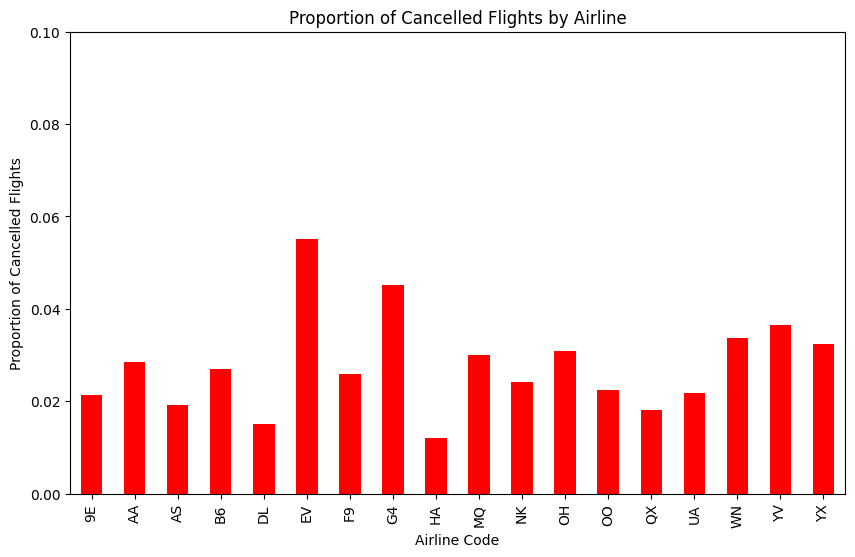

In [17]:
# Calculate total cancellations per airline
cancelled_counts_1 = df.groupby('AIRLINE_CODE')['CANCELLED'].sum()

# Calculate total flights per airline
total_flights_1 = df.groupby('AIRLINE_CODE')['CANCELLED'].count()

# Calculate the proportion of cancelled flights per airline
cancelled_proportion_1 = cancelled_counts_1 / total_flights_1

# Create a bar plot of cancelled flight proportions
plt.figure(figsize=(10, 6))
cancelled_proportion_1.plot(kind='bar', color='red')
plt.title('Proportion of Cancelled Flights by Airline')
plt.xlabel('Airline Code')
plt.ylabel('Proportion of Cancelled Flights')
plt.ylim(0, 0.1)  # Set y-axis limit to ensure proper visualization of proportions
plt.show()


In [18]:
# Create a contingency table (cross-tabulation)
contingency_table_1 = pd.crosstab(df['AIRLINE_CODE'], df['CANCELLED'])

# Perform Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table_1)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}"),
print(f"Degrees of freedom: {dof}")


Chi-square statistic: 6235.42531094938
P-value: 0.0
Degrees of freedom: 17


In [19]:
# Count the number of unique departure airports
num_unique_departure_airports = df['ORIGIN'].nunique()

print(f"Number of unique departure cities: {num_unique_departure_airports}")

Number of unique departure cities: 380


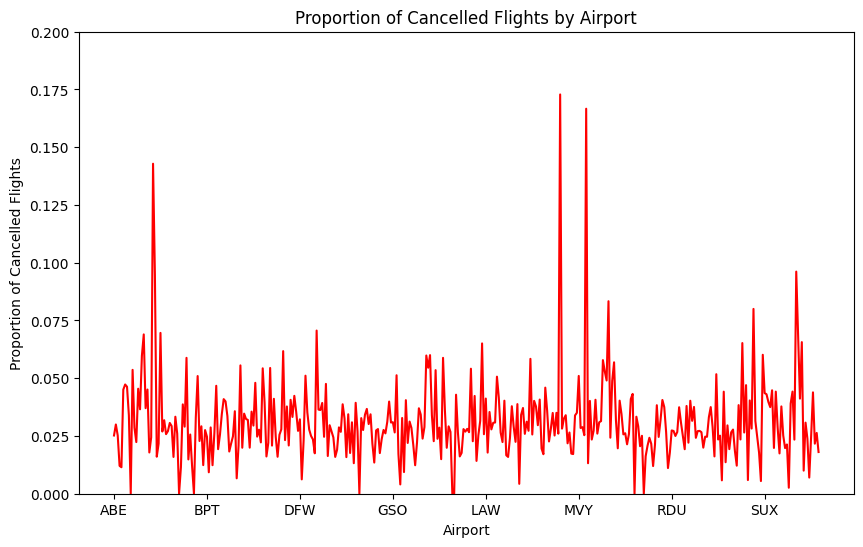

In [20]:
# Calculate total cancellations per airport
cancelled_counts_2 = df.groupby('ORIGIN')['CANCELLED'].sum()

# Calculate total flights per airline
total_flights_2 = df.groupby('ORIGIN')['CANCELLED'].count()

# Calculate the proportion of cancelled flights per airline
cancelled_proportion_2 = cancelled_counts_2 / total_flights_2

# Create a bar plot of cancelled flight proportions
plt.figure(figsize=(10, 6))
cancelled_proportion_2.plot(kind='line', color='red')
plt.title('Proportion of Cancelled Flights by Airport')
plt.xlabel('Airport')
plt.ylabel('Proportion of Cancelled Flights')
plt.ylim(0, 0.2)
plt.show()


In [21]:
contingency_table_2 = pd.crosstab(df['ORIGIN'], df['CANCELLED'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table_2)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
#print("Expected frequencies:")
#print(expected)


Chi-square statistic: 6970.551315709208
P-value: 0.0
Degrees of freedom: 379


In [22]:
print(df['ARR_DELAY'].mean())

4.260858150279257


In [23]:
mean_delayed_by_airline = df.groupby('AIRLINE_CODE')['ARR_DELAY'].mean()

print(mean_delayed_by_airline)

AIRLINE_CODE
9E    -1.258539
AA     6.661229
AS     1.097900
B6    12.276125
DL     1.085079
EV    10.031976
F9    11.100429
G4    13.284601
HA     3.894757
MQ     3.278914
NK     8.029485
OH     3.928655
OO     4.023311
QX     2.376242
UA     5.035985
WN     3.269796
YV     7.309810
YX     0.590176
Name: ARR_DELAY, dtype: float64


In [24]:
class Anova:
  def __init__(self, df, col1: str = "ARR_DELAY", col2: str = "AIRLINE_CODE"):
    self.df = df[[col1, col2]]
    self.airlines = ['UA', 'DL', 'NK', 'AA', 'YX', 'AS', 'WN', 'B6', 'OH', 'G4',
                     'EV', 'OO', '9E', 'MQ', 'F9', 'YV', 'QX', 'HA']
    self.col1 = col1
    self.col2 = col2

  def filter_data(self):
    df_col = self.df[self.col1]

    self.df['z_score'] = (df_col - df_col.mean()) / df_col.std()

    df_no_outliers = self.df[np.abs(self.df['z_score']) <= 3]
    df_no_outliers = df_no_outliers.drop(columns=['z_score'])
    self.df = df_no_outliers

  def mean(self):
    df_col = self.df[self.col1]
    return df_col.mean()

  def plot_maker(self):

    df_col = self.df[self.col1]
    df_col = self.df[self.col1]
    plt.figure(figsize=(12, 6))
    sns.boxplot(x = df_col)
    plt.title('Box plot after removing outliers')

    return plt.show()

  def anova_stats(self):
    delay_times = list()
    for code in self.airlines:
      airline_delay= self.df[self.df[self.col2] == code][self.col1]
      delay_times.append(airline_delay)

    anova_result = stats.f_oneway(*delay_times)

    return f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}"

analysis = Anova(pd.read_csv(f"/content/MyDrive/MyDrive/flight_data.csv"))

analysis.filter_data()

print(analysis.mean())

analysis.anova_stats()



0.018343460684425054


'ANOVA test result: F-statistic = 1182.5929791586866, p-value = 0.0'

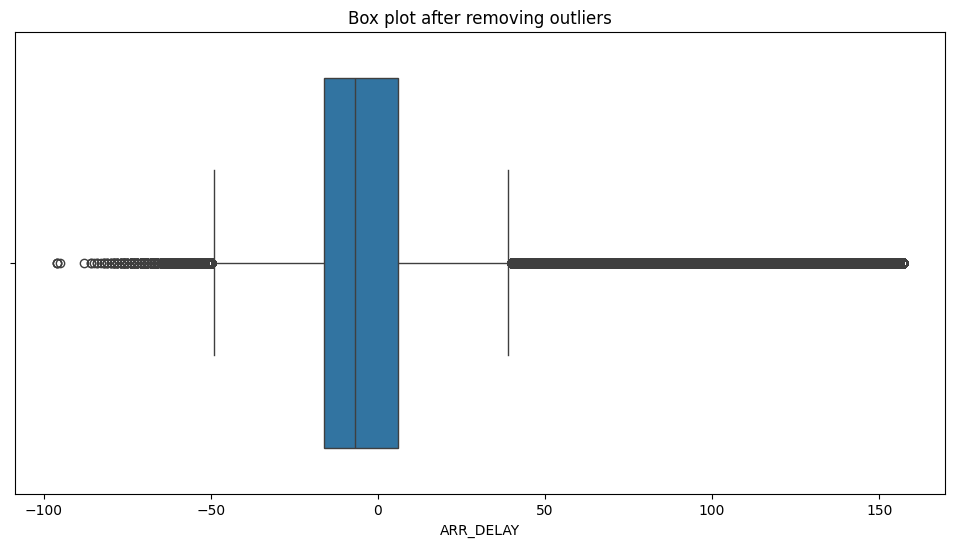

In [25]:
analysis.plot_maker()


AIRLINE_CODE        AA        OO        WN
YEAR                                      
2019          0.021008  0.020497  0.024425
2020          0.060653  0.042092  0.082078
2021          0.023155  0.017323  0.022054
2022          0.029794  0.018091  0.032407
2023          0.014768  0.016208  0.013025
AIRLINE_CODE     AA     OO      WN
YEAR                              
2019          96676  85329  139406
2020          58447  61009   98346
2021          75016  76893  108595
2022          88842  75342  133923
2023          64125  45163   96200
Chi-square statistic: 0.006960290029202889
P-value: 0.9999999999939051
Degrees of freedom: 8


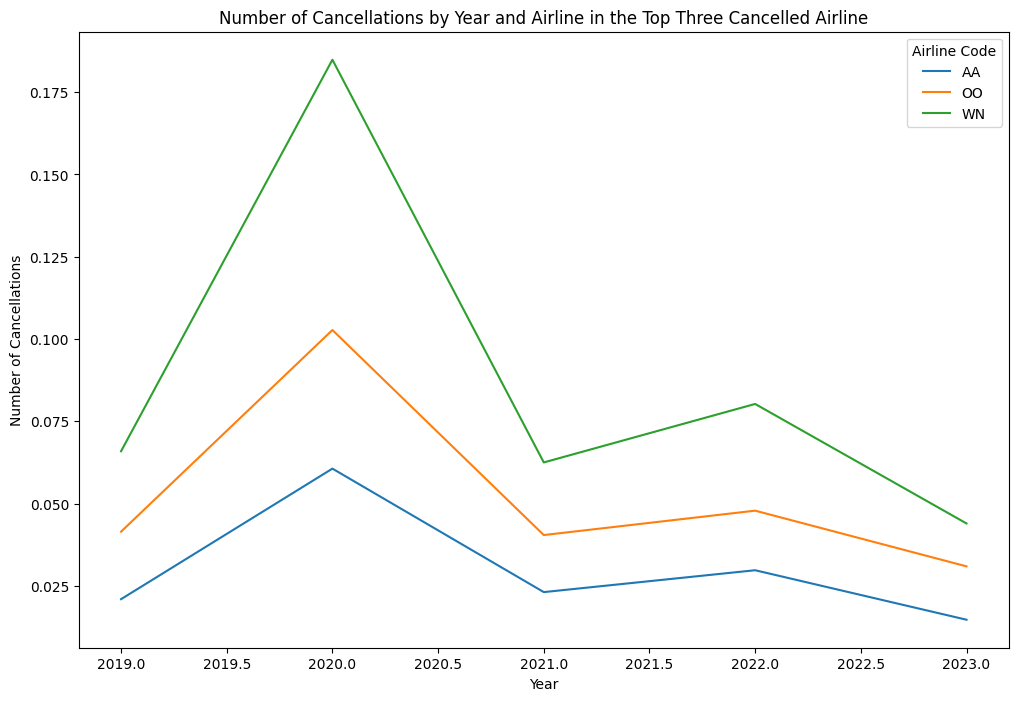

In [26]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

df['YEAR'] = df['FL_DATE'].dt.year

the_head_3_airlines_with_cancellation_numbers = df.loc[df['AIRLINE_CODE'].isin(['AA','OO',"WN"])]

overall_counts_cancelled = the_head_3_airlines_with_cancellation_numbers.groupby(['YEAR', 'AIRLINE_CODE'])['CANCELLED'].sum()
overall_counts = the_head_3_airlines_with_cancellation_numbers.groupby(['YEAR','AIRLINE_CODE'])['CANCELLED'].count()

# Calculate the proportion of cancelled flights per airline
cancelled_proportion_2 = overall_counts_cancelled / overall_counts

cancelled_proportion_2 = cancelled_proportion_2.unstack()

print(cancelled_proportion_2)

# Create a contingency table (cross-tabulation)
contingency_table_flight = pd.crosstab(df["YEAR"], the_head_3_airlines_with_cancellation_numbers["AIRLINE_CODE"])

print(contingency_table_flight)

# Perform Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(cancelled_proportion_2)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

cancelled_proportion_2.plot(kind='line', figsize=(12, 8), stacked=True)

plt.title('Number of Cancellations by Year and Airline in the Top Three Cancelled Airline')
plt.xlabel('Year')
plt.ylabel('Number of Cancellations')
plt.legend(title='Airline Code')
plt.show()